# Customer Segmentation Using Clustering Algorithms

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [10,5]
plt.rcParams['figure.dpi'] =  300

In [2]:
df = pd.read_csv('Mall_Customers.csv',index_col=0)
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


# Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [4]:
df.shape

(200, 4)

In [5]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [6]:
df.rename(columns={'Genre':'Gender','Annual Income (k$)':'Annual_Income','Spending Score (1-100)': 'Spending_score'},inplace=True)

In [7]:
df.head()

,Gender,Age,Annual_Income,Spending_score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [8]:
df.skew()

Age               0.485569
Annual_Income     0.321843
Spending_score   -0.047220
dtype: float64

In [9]:
df.isna().sum()

Gender            0
Age               0
Annual_Income     0
Spending_score    0
dtype: int64

In [10]:
sns.set_theme(style='darkgrid',palette='viridis')

<Axes: ylabel='CustomerID'>

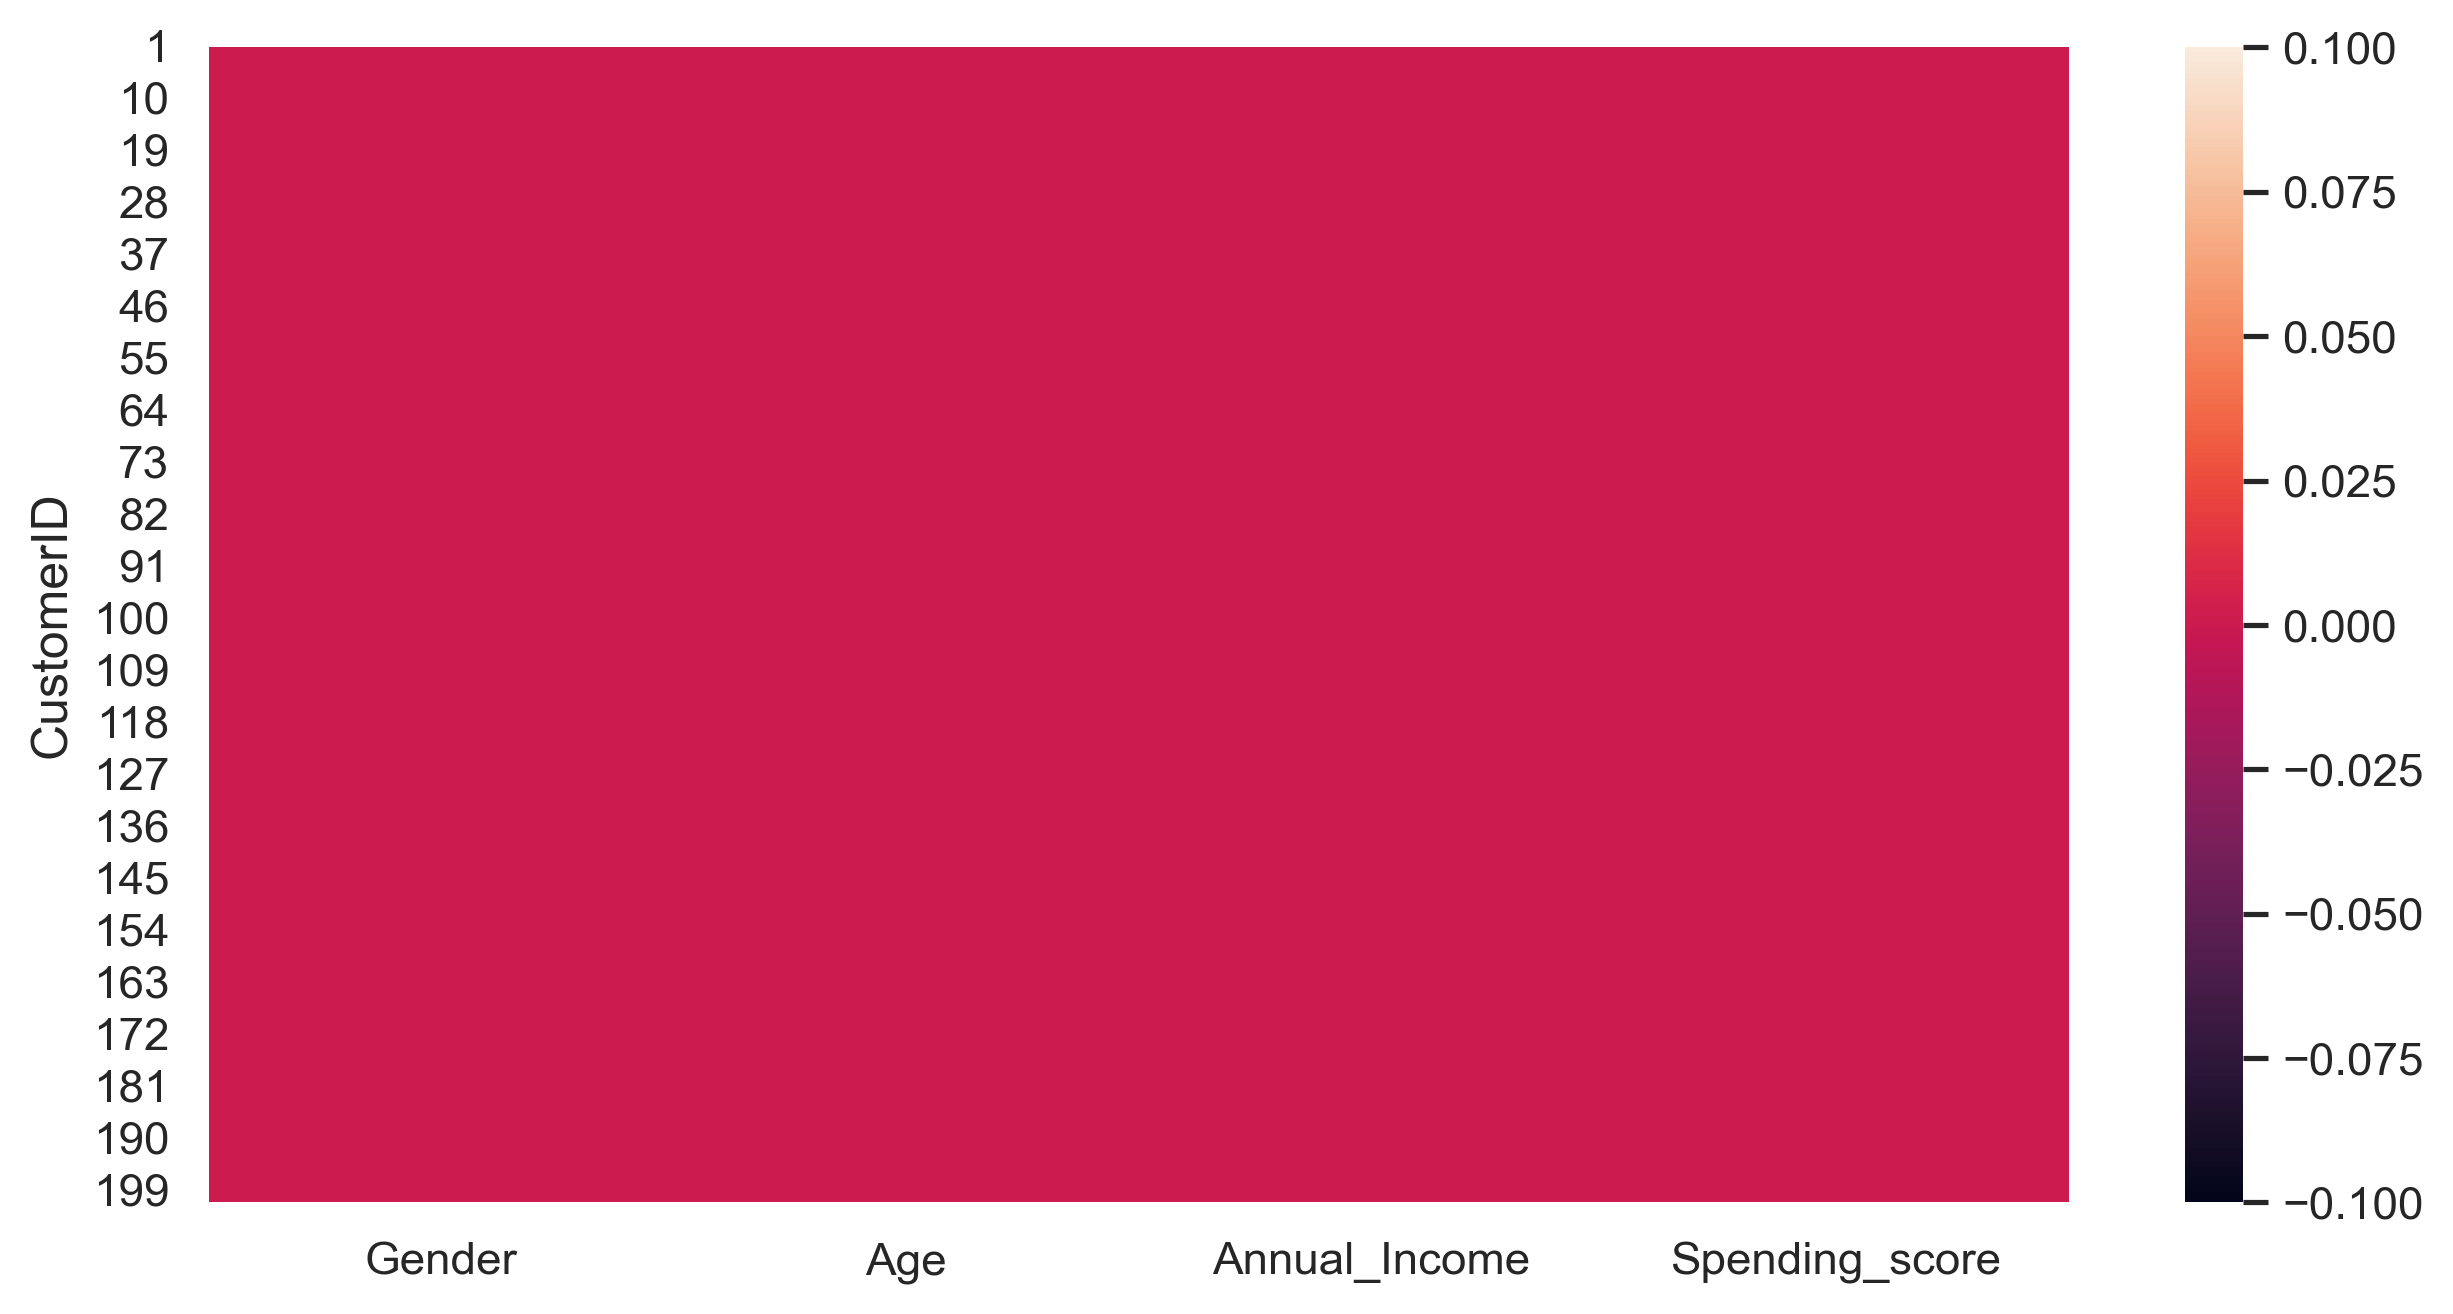

In [11]:
sns.heatmap(df.isna())   #There are no missing values present in this dataset.

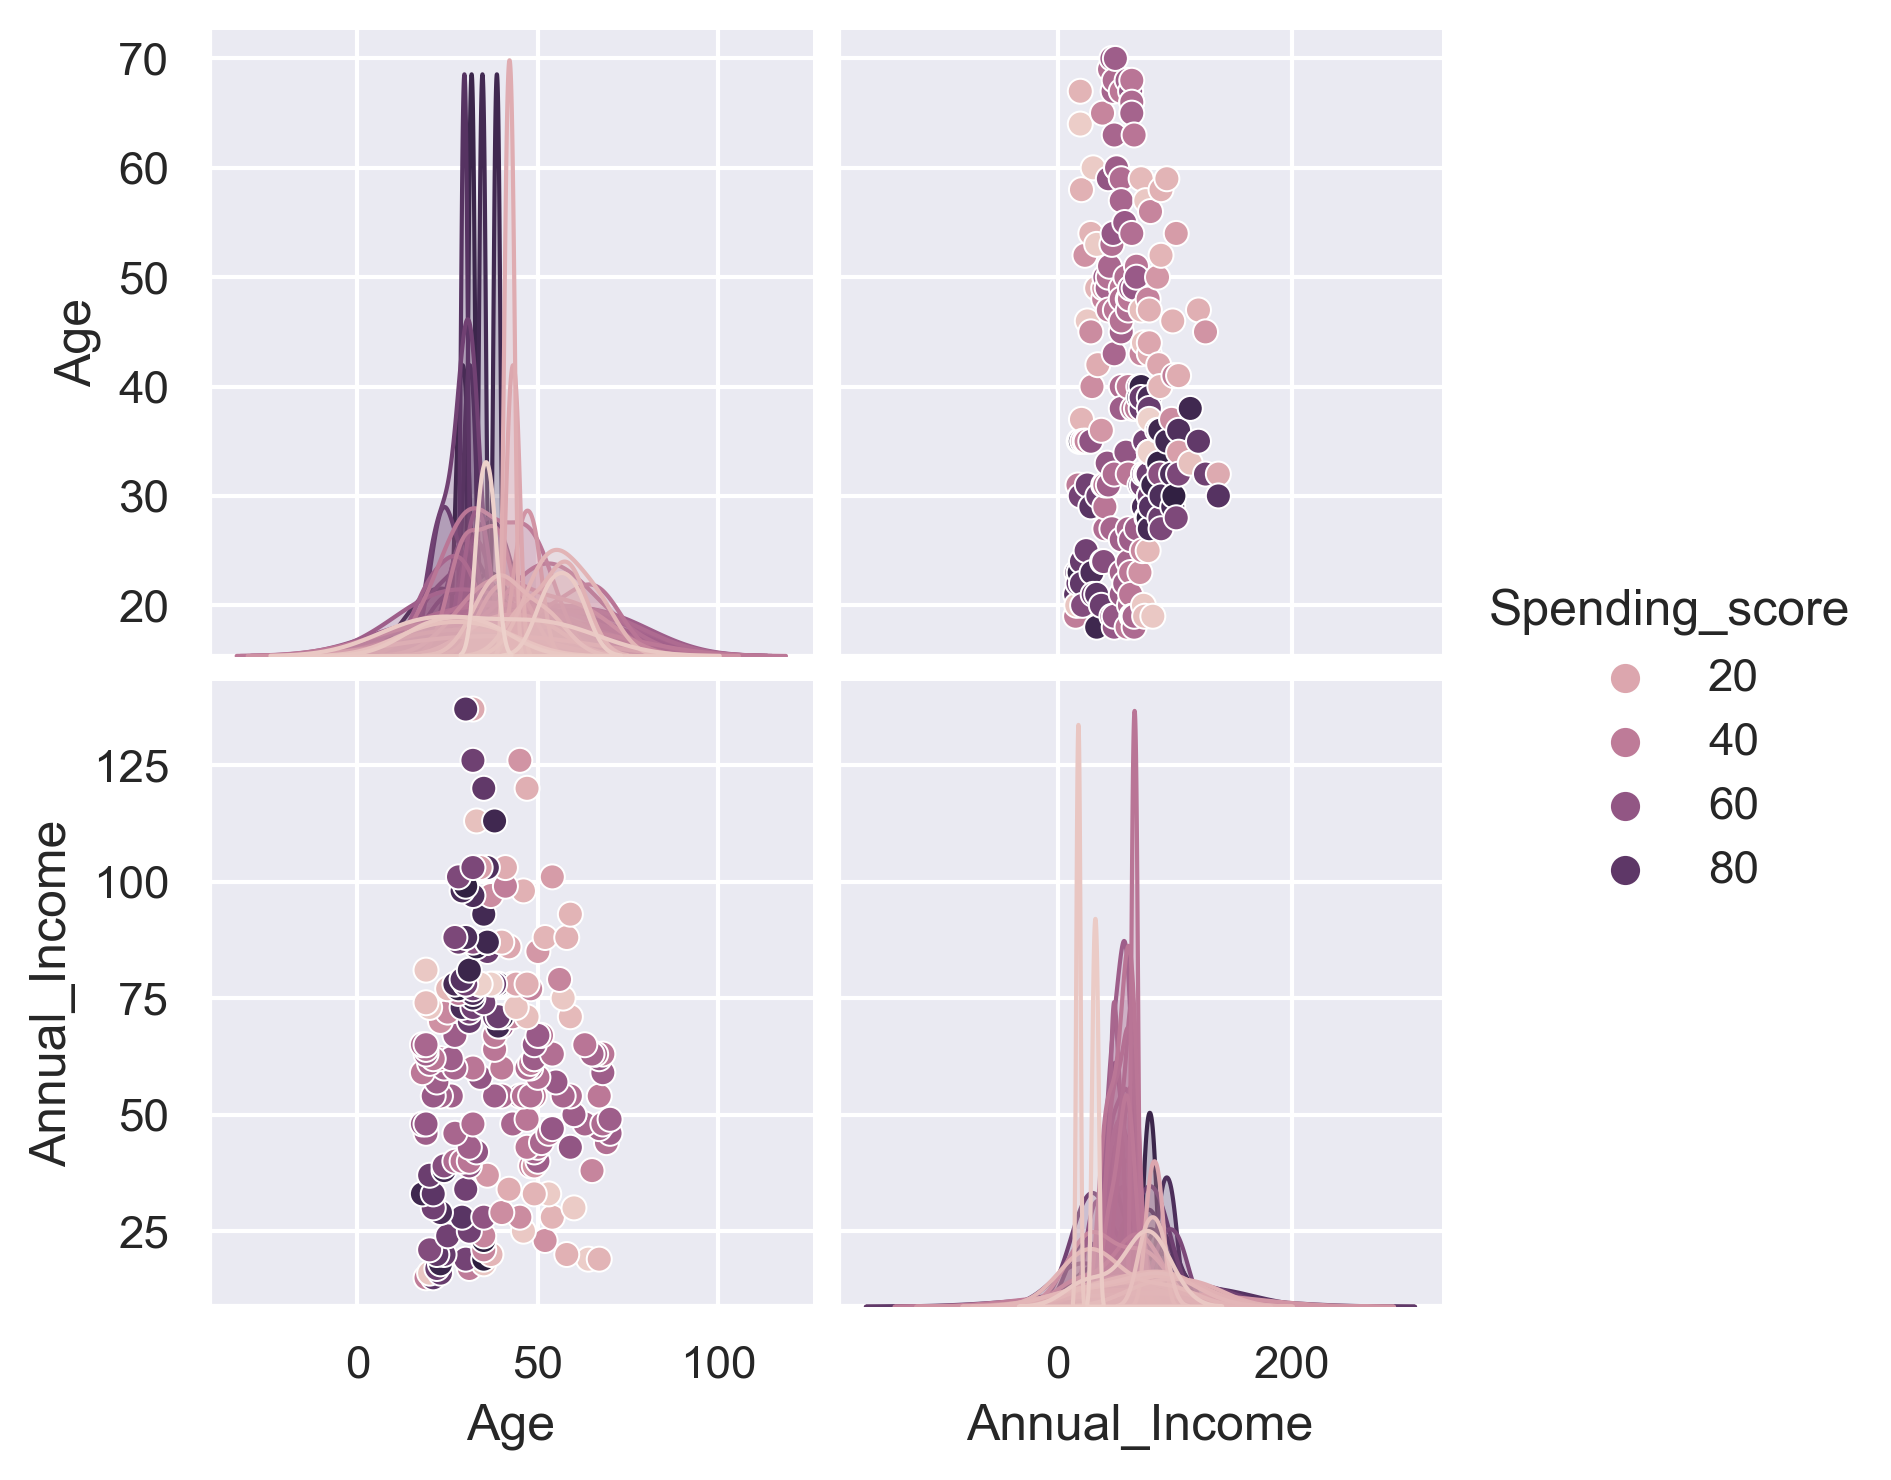

In [12]:
sns.pairplot(df,hue='Spending_score')

<Axes: >

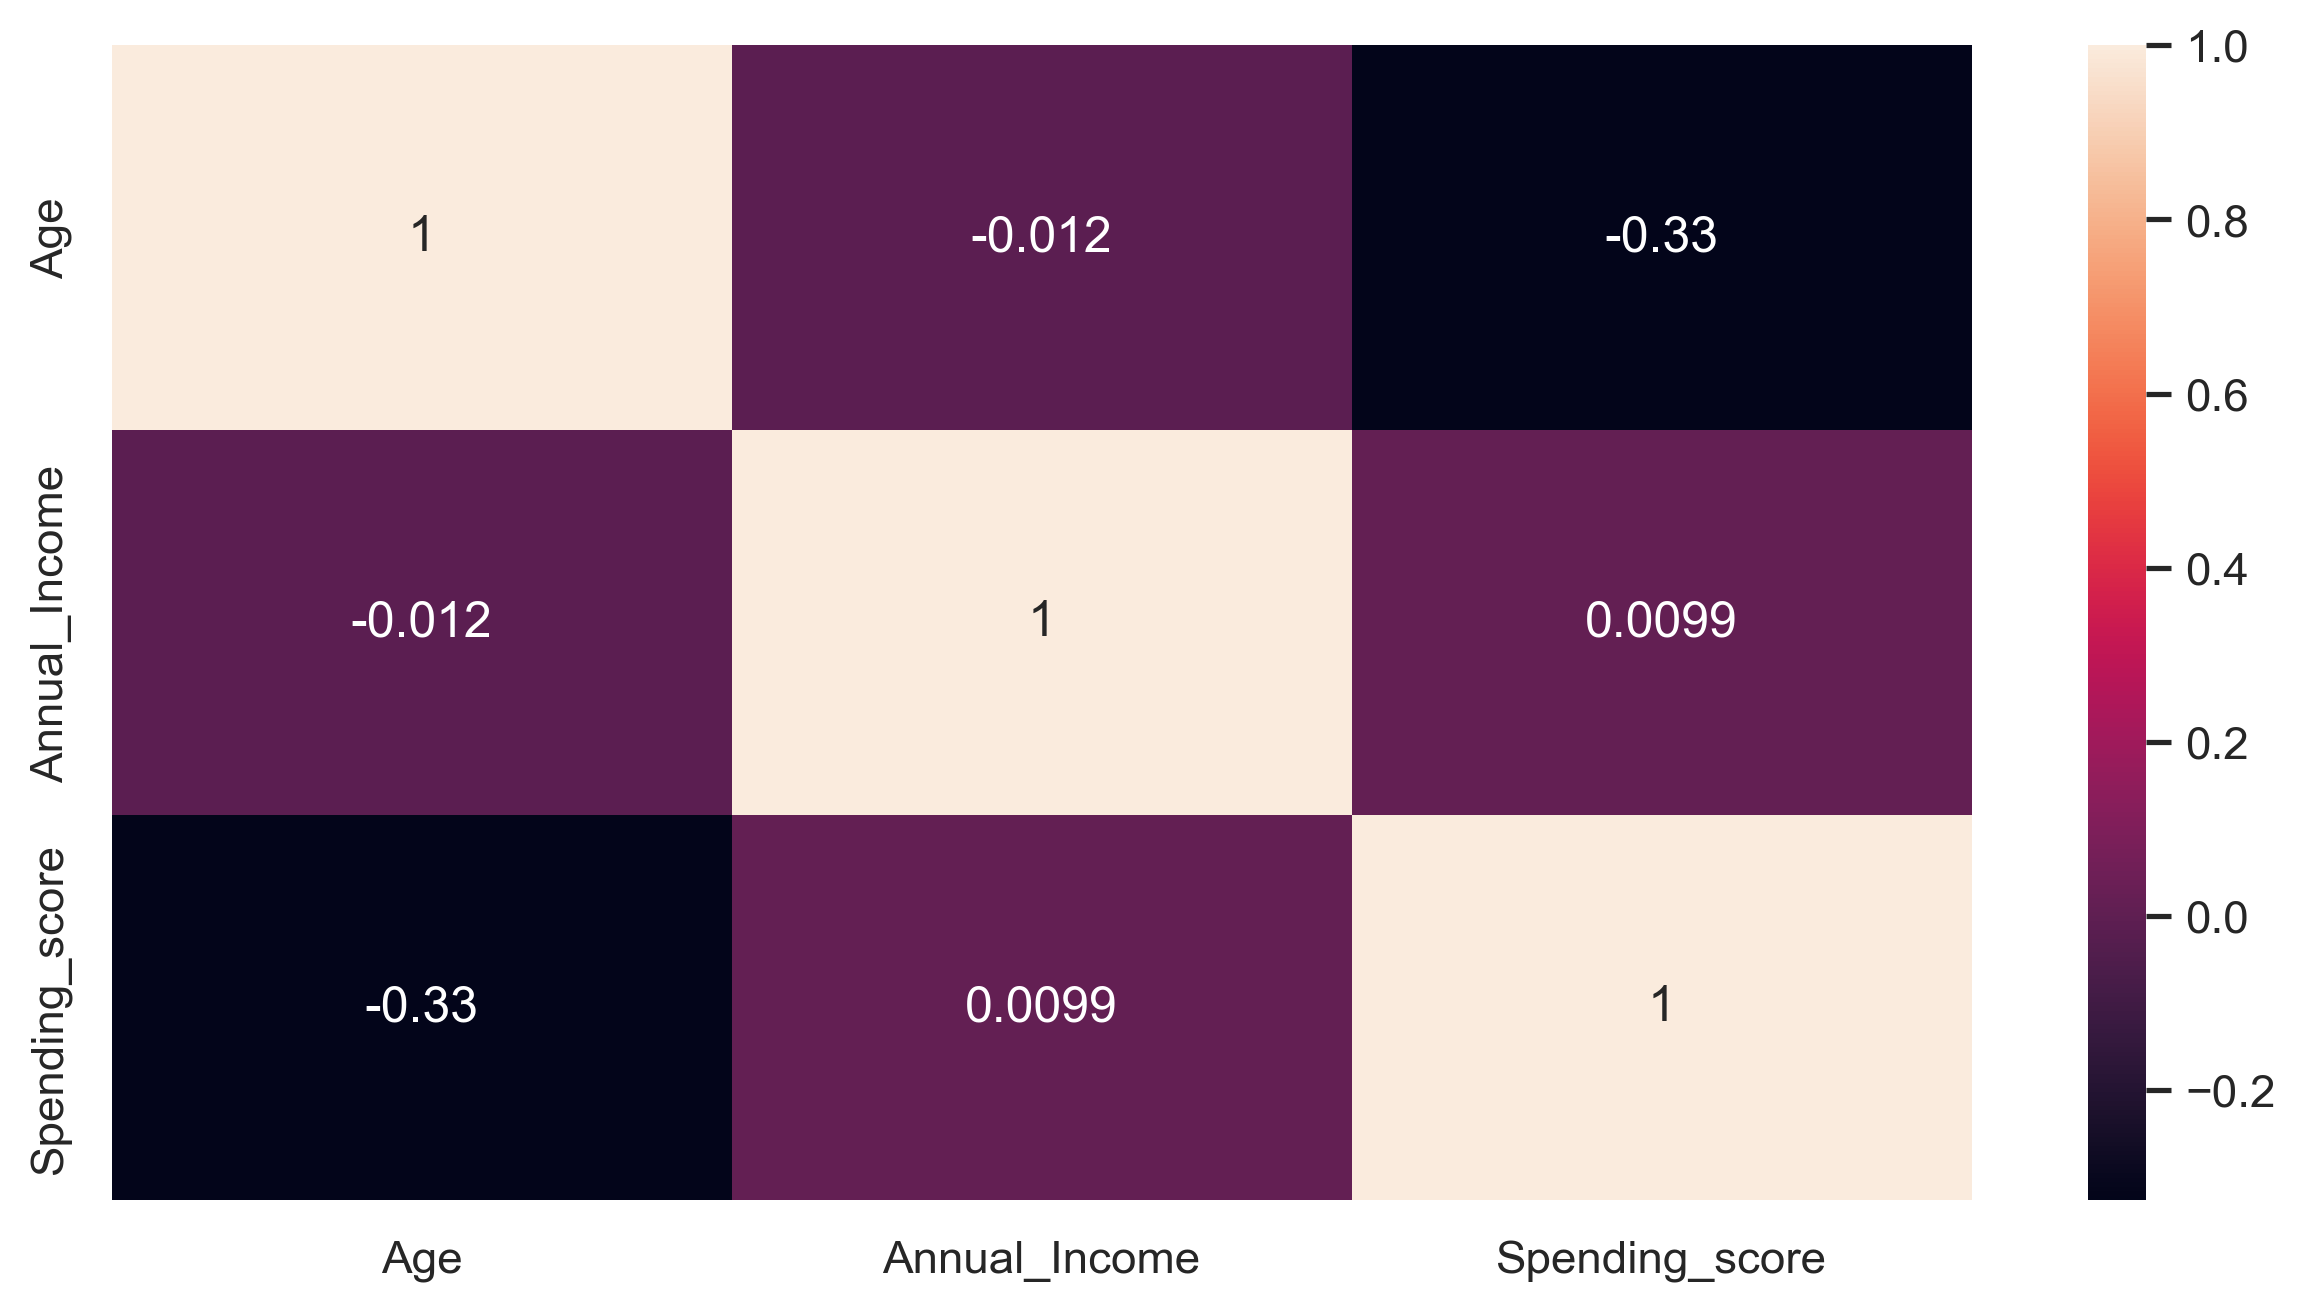

In [13]:
sns.heatmap(df.corr(),annot=True)

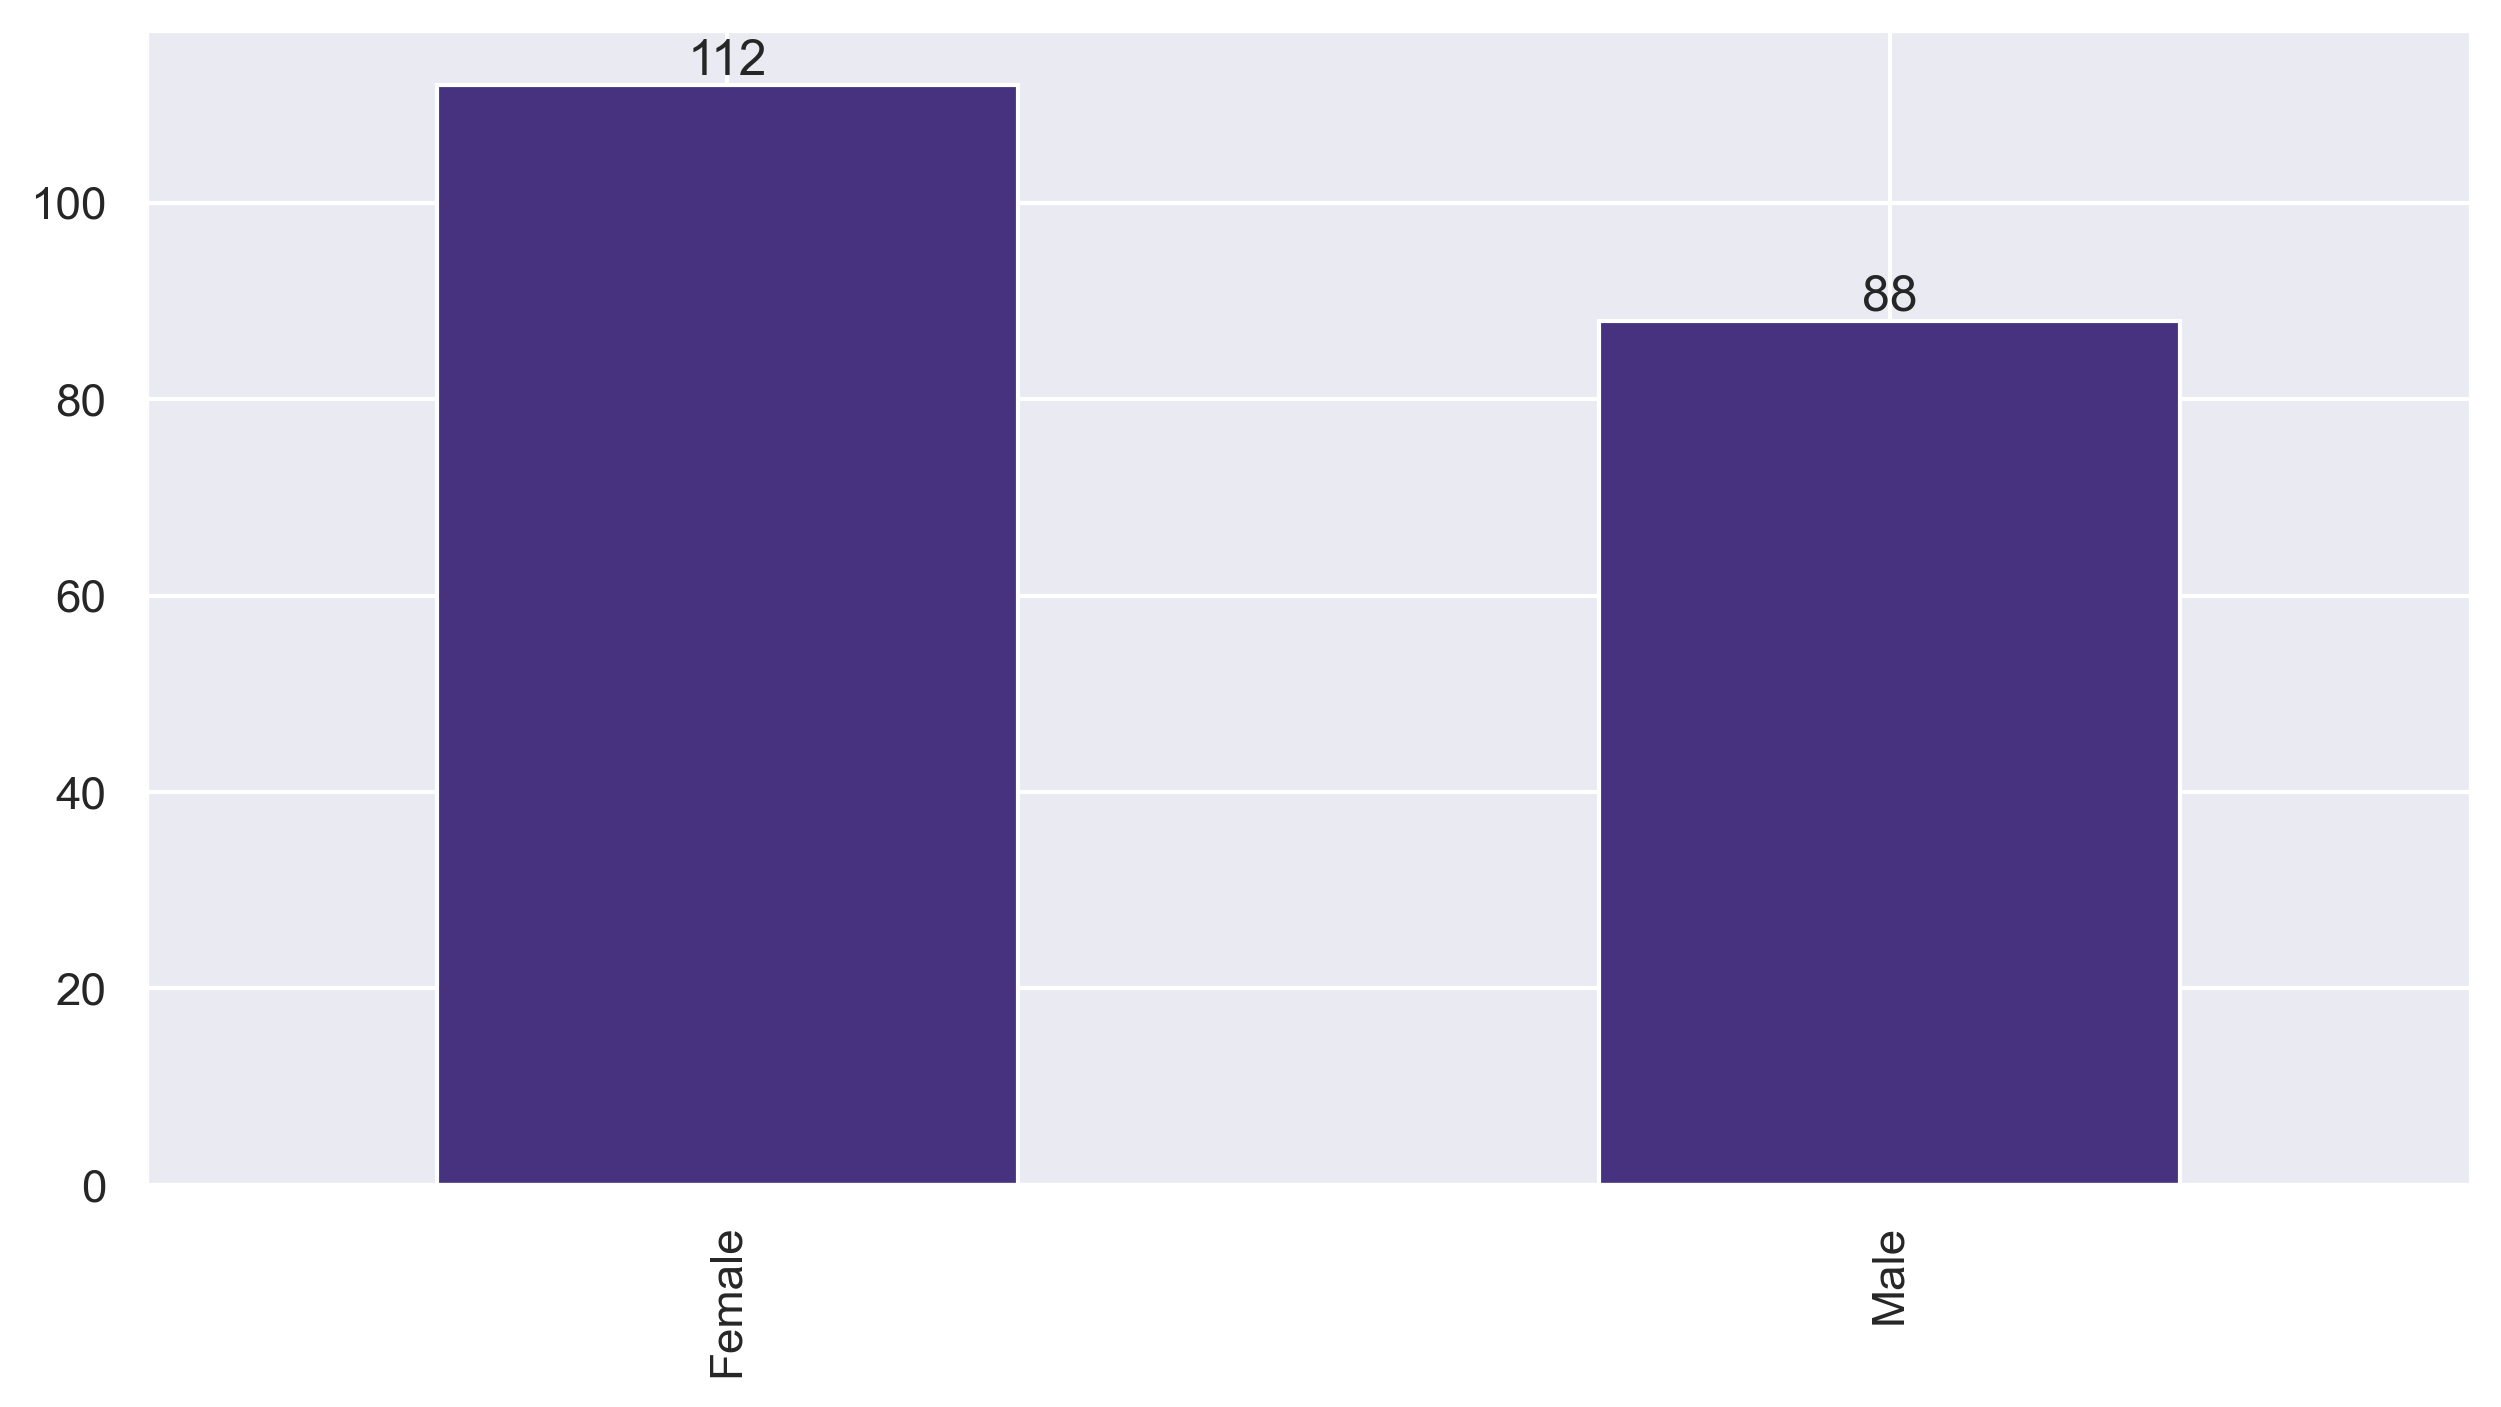

In [14]:
barplot = df['Gender'].value_counts().plot(kind='bar')

for i in barplot.containers:
    barplot.bar_label(i)

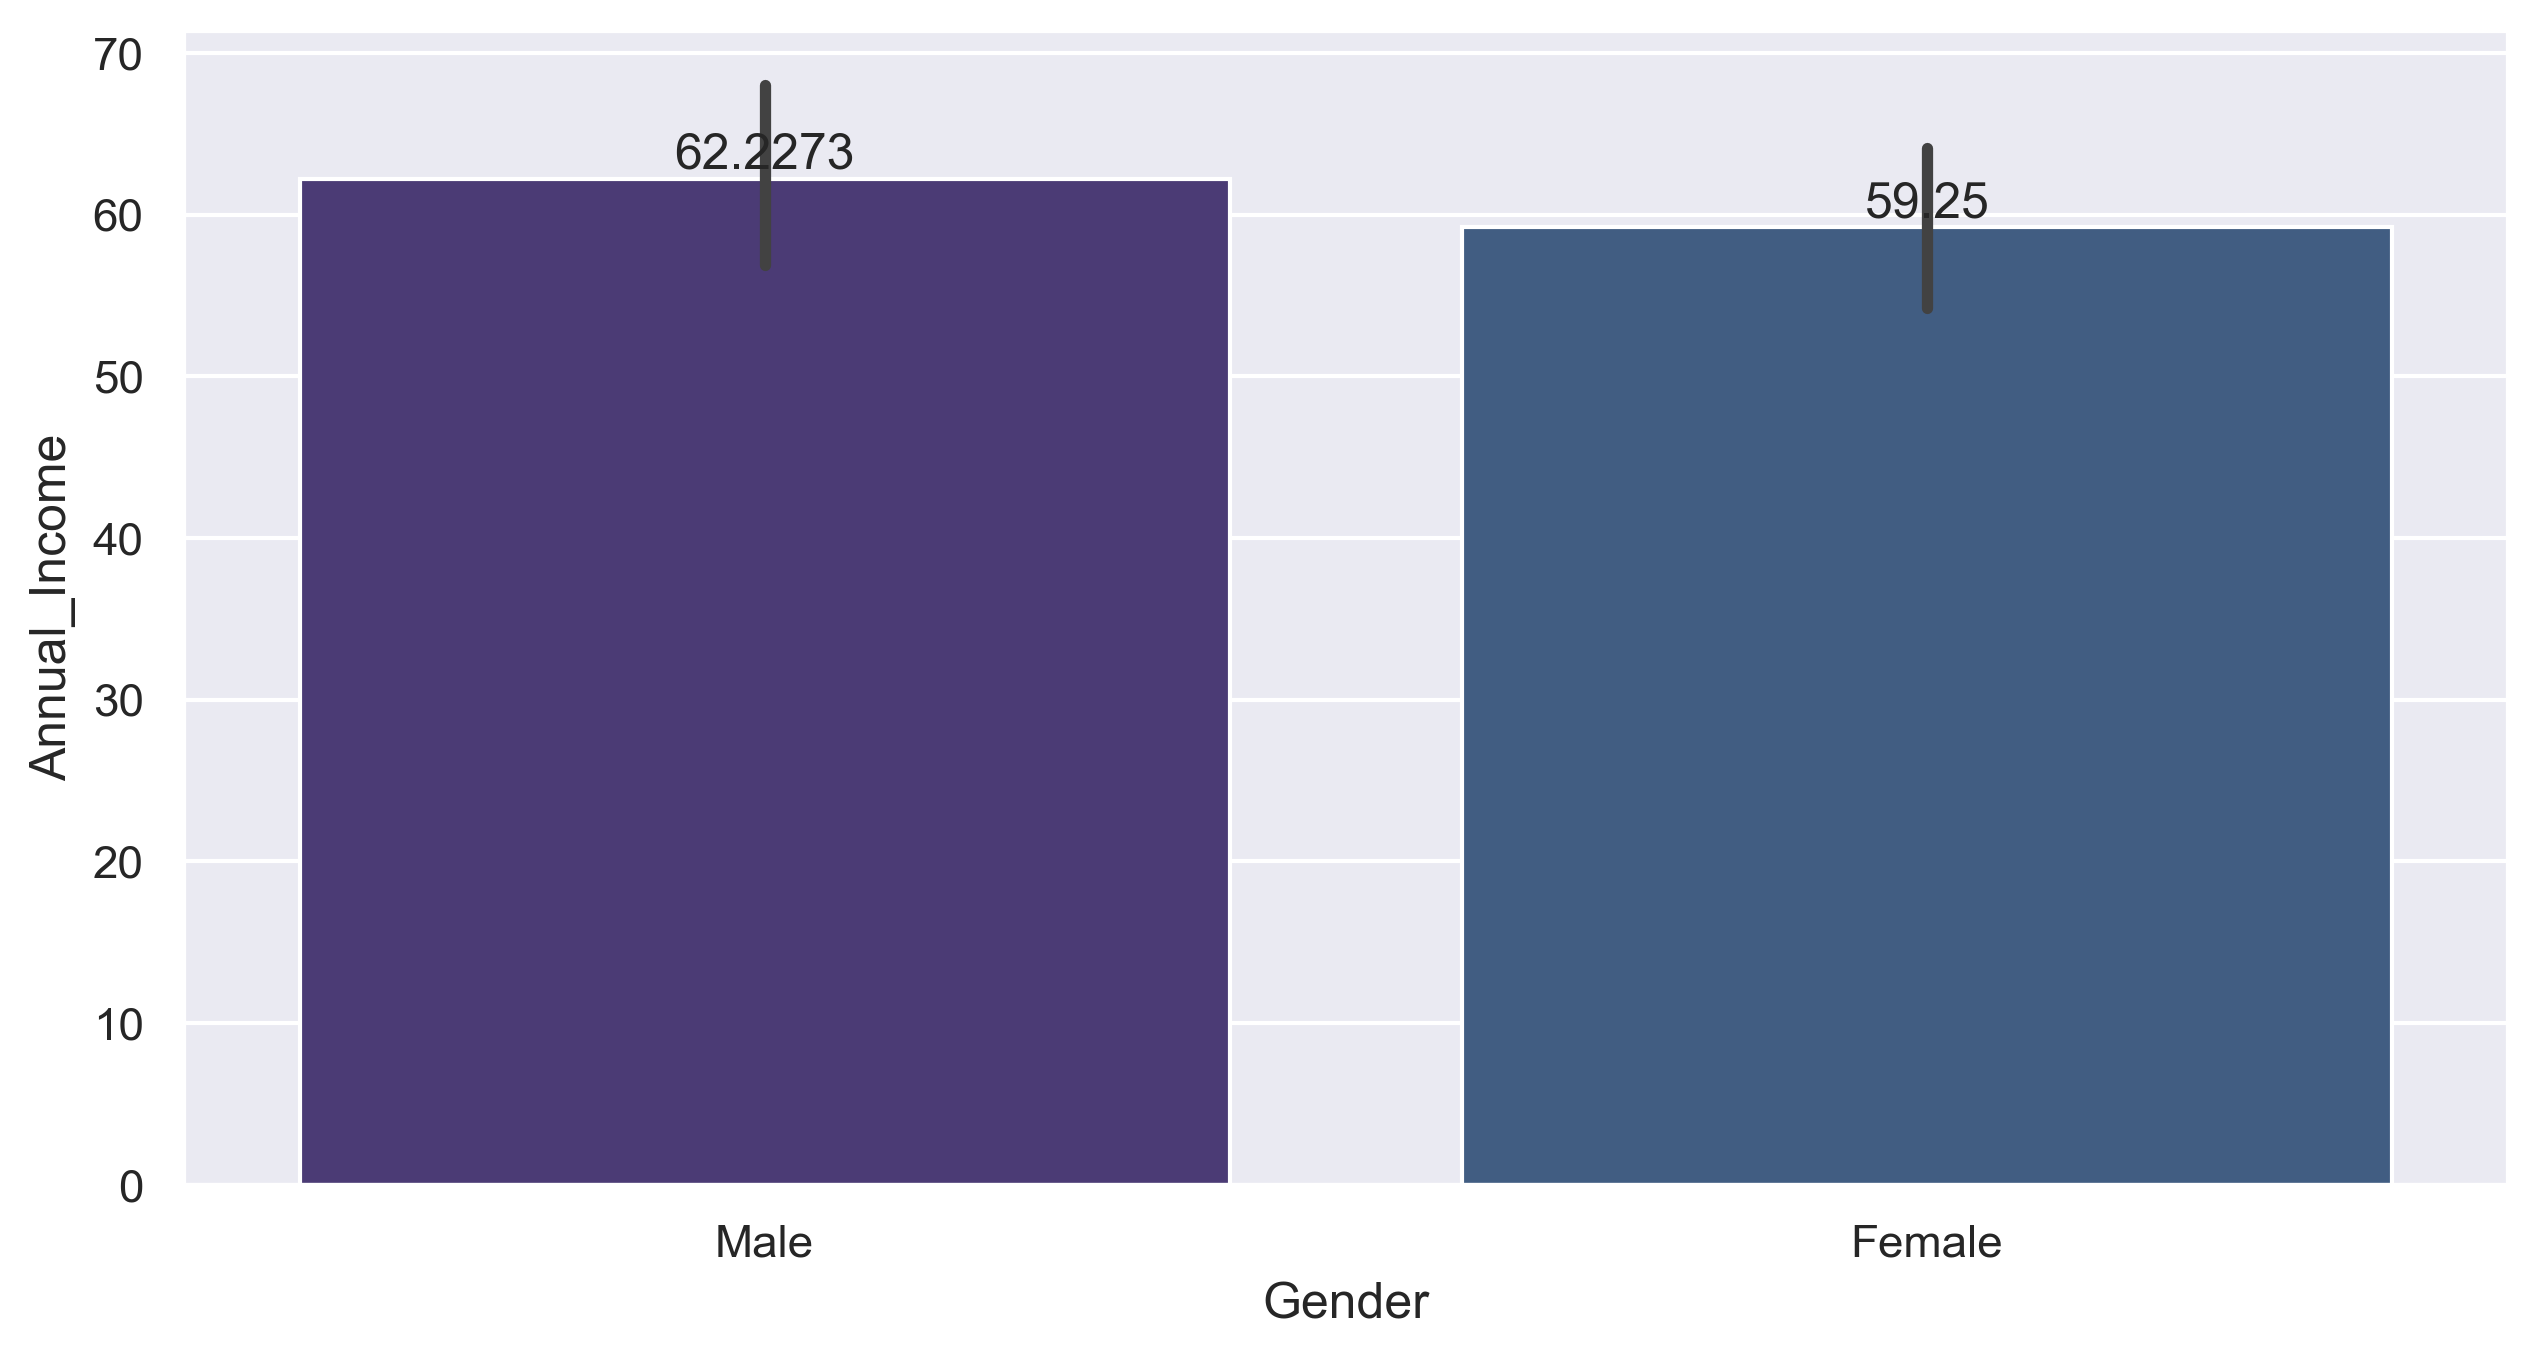

In [15]:
barplot_a = sns.barplot(x = df['Gender'],y = df['Annual_Income'])

for i in barplot_a.containers:
    barplot_a.bar_label(i)

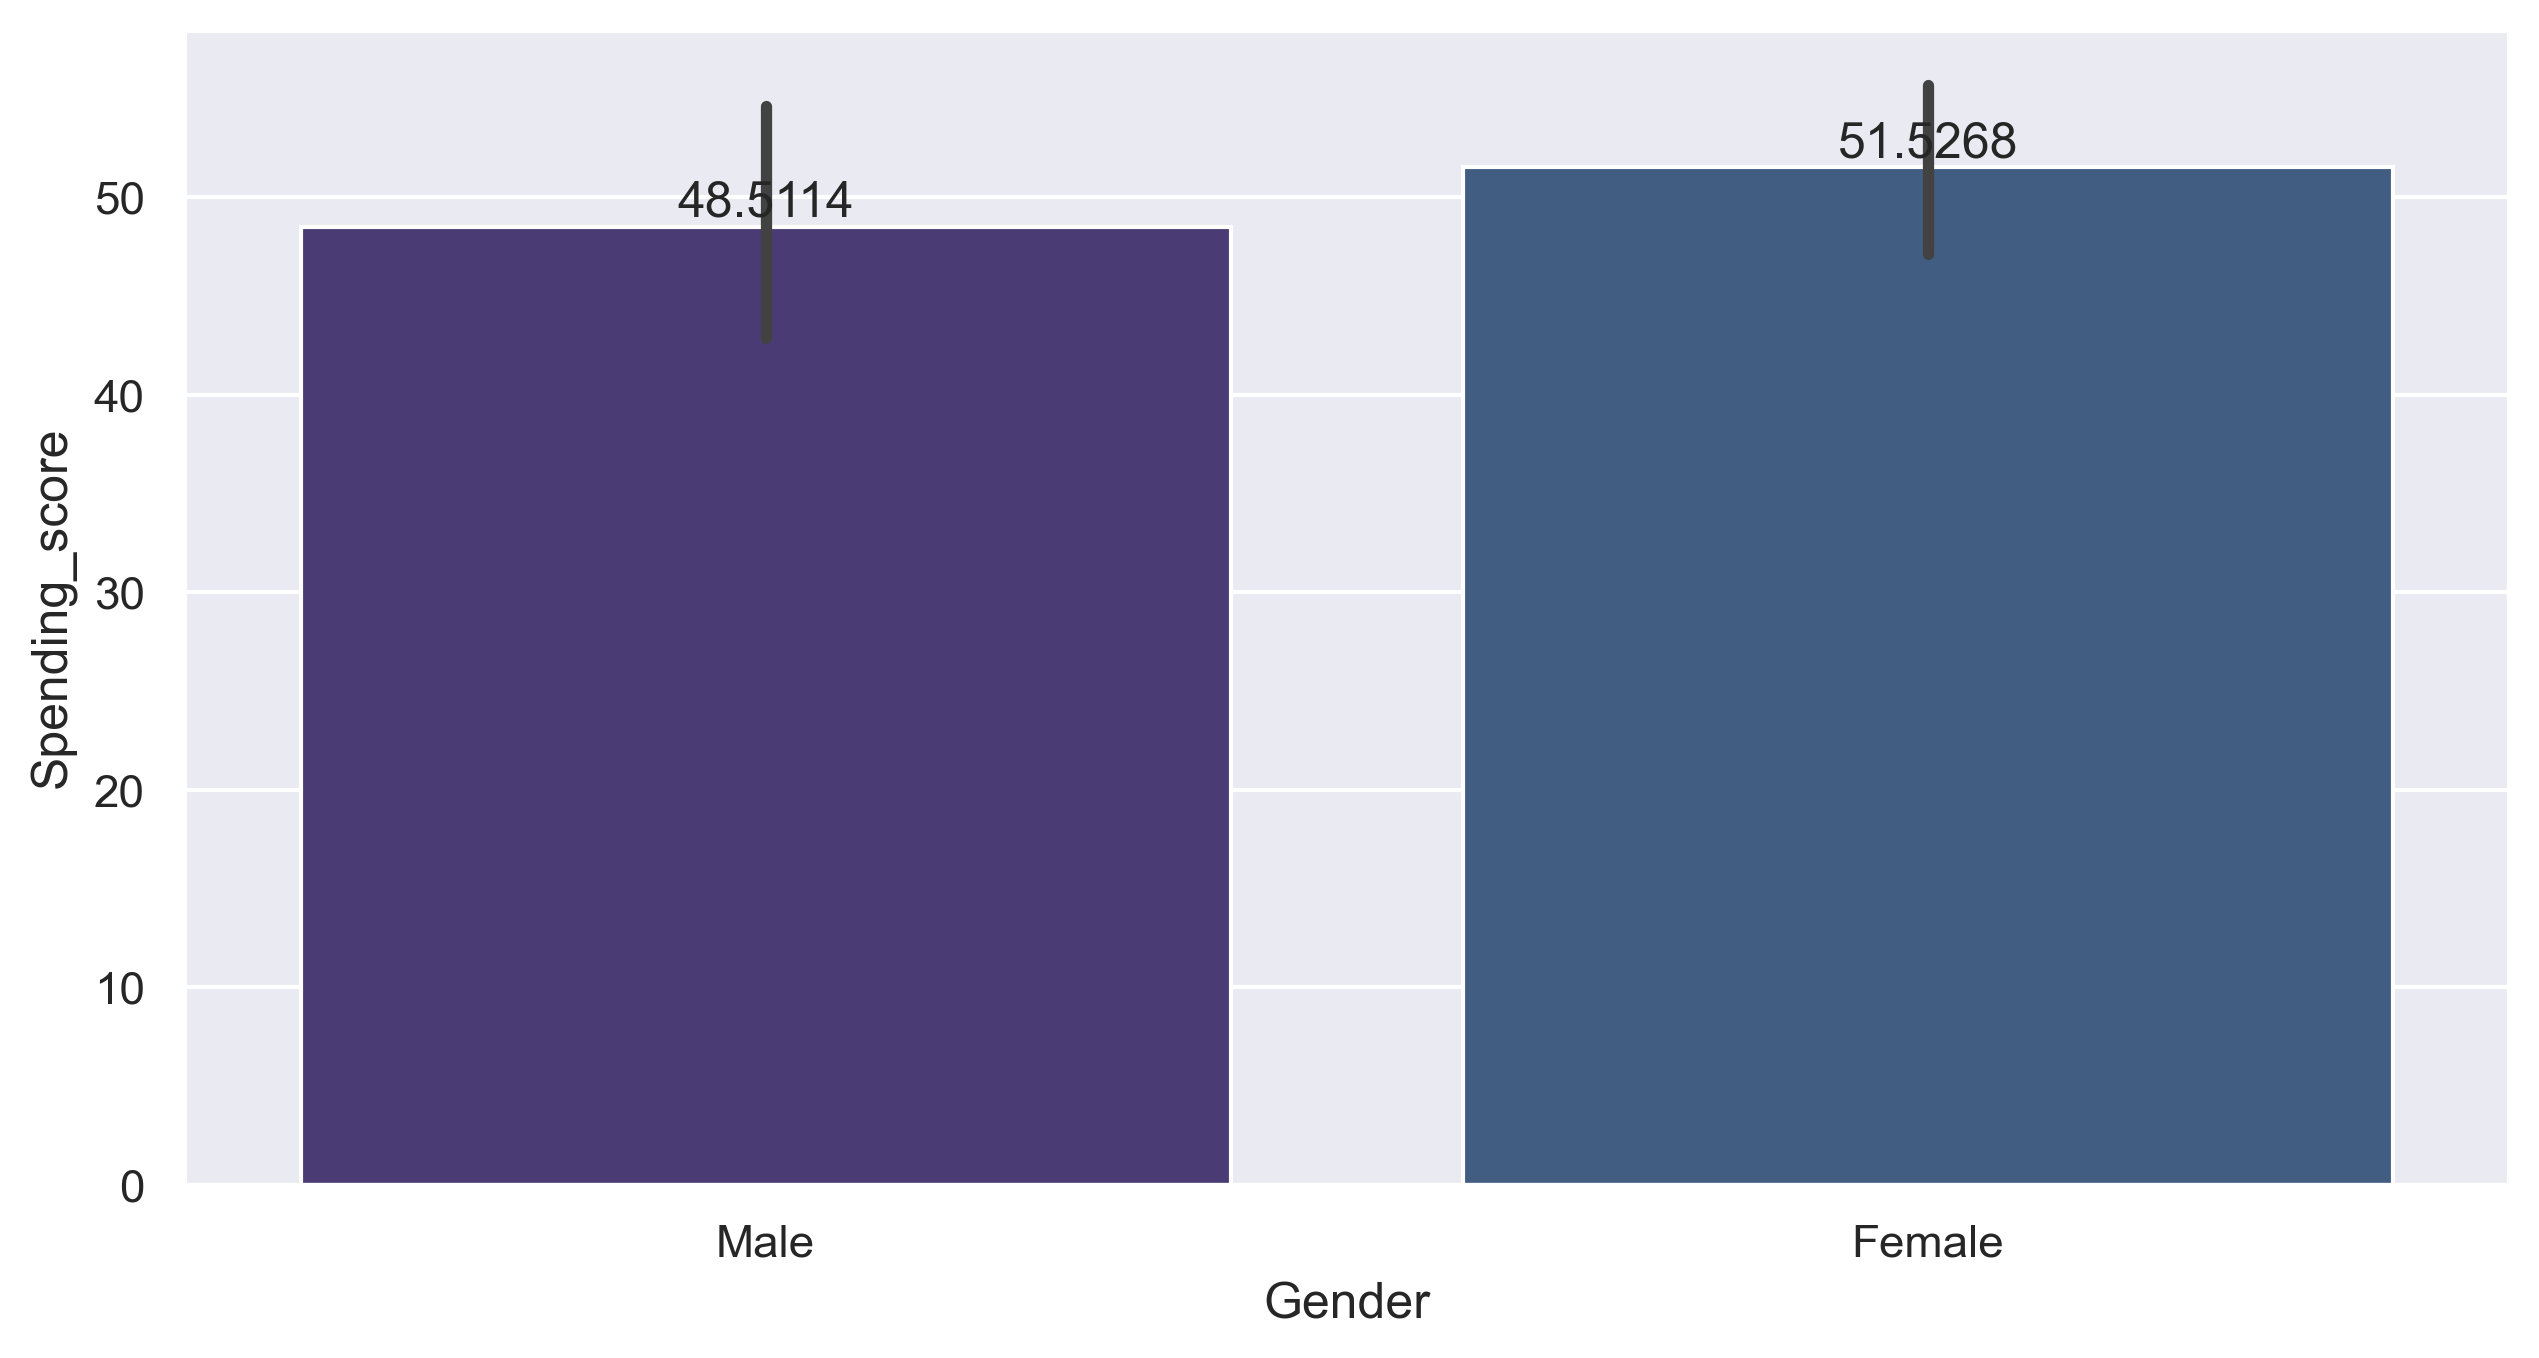

In [16]:
bar = sns.barplot(x = df['Gender'],y = df['Spending_score']) 

for i in bar.containers:
    bar.bar_label(i)

<Axes: xlabel='Annual_Income', ylabel='Spending_score'>

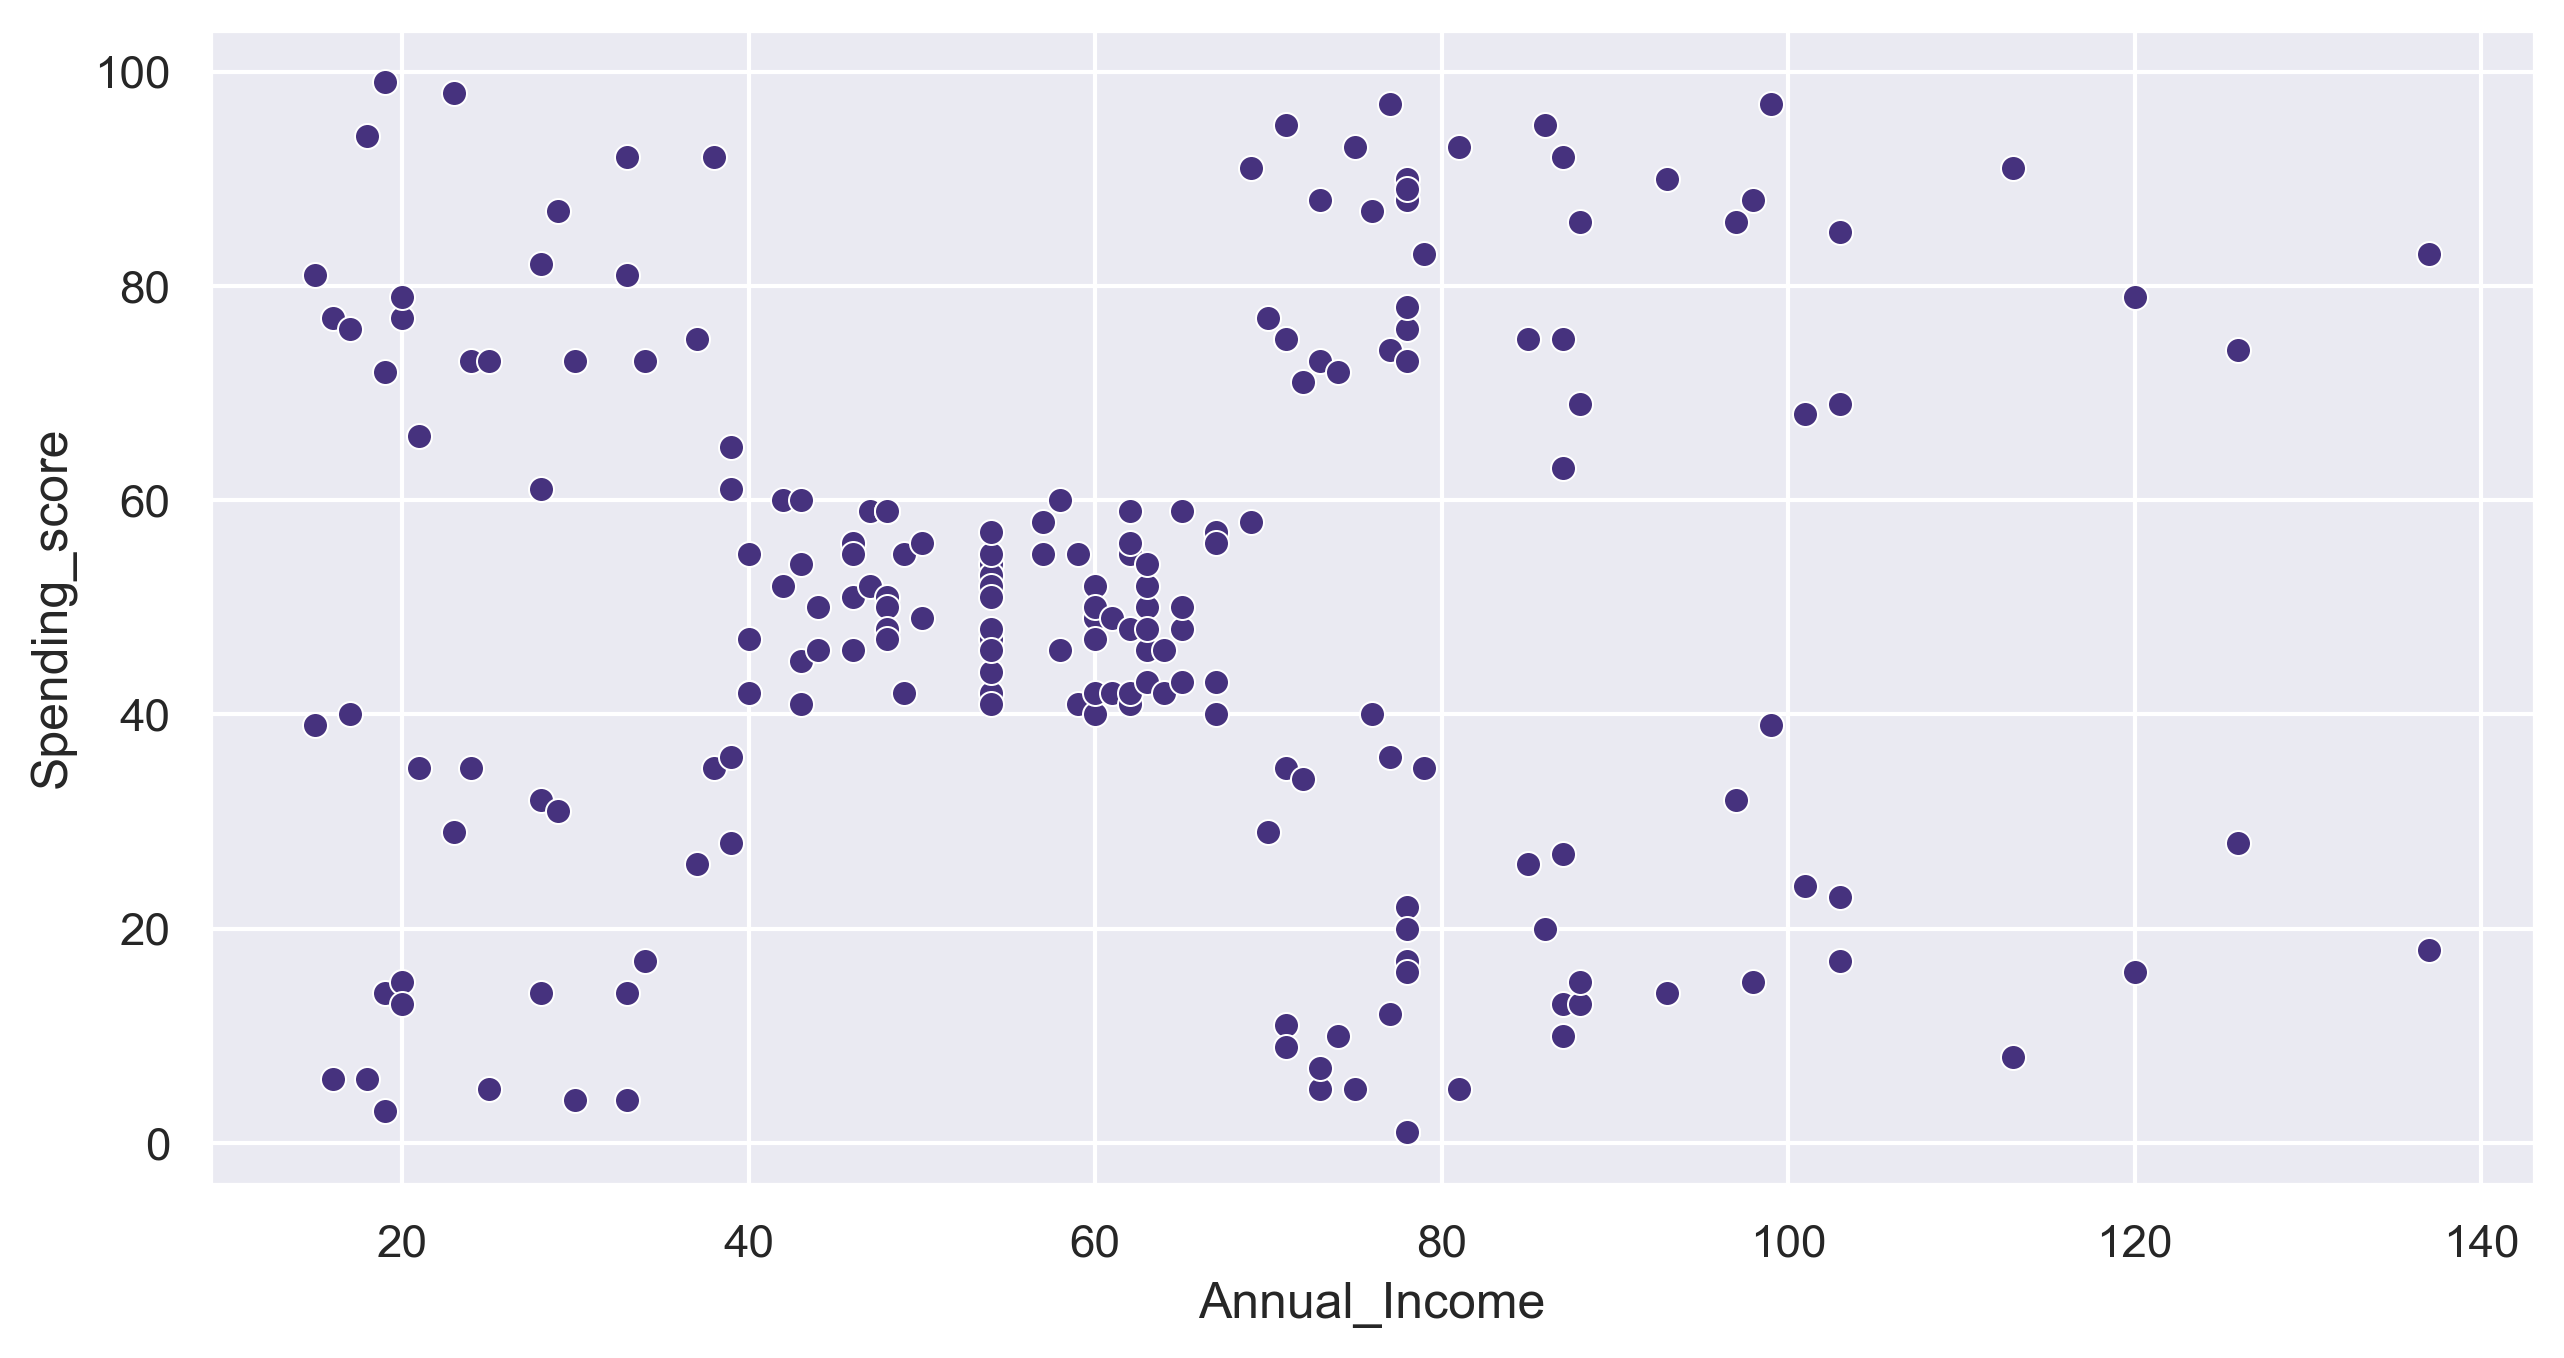

In [17]:
sns.scatterplot(x = df['Annual_Income'],y = df['Spending_score'])

# Model Building

In [18]:
#Standardization
from sklearn.preprocessing import StandardScaler

In [19]:
sc = StandardScaler()

x = sc.fit_transform(df.drop(columns=['Gender']))
x

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

In [20]:
from sklearn.cluster import KMeans

In [21]:
km = KMeans()
yp = km.fit_predict(x)
yp

array([4, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4,
       5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 1, 4, 6, 4,
       5, 4, 6, 0, 0, 0, 6, 0, 0, 1, 6, 6, 6, 1, 0, 6, 1, 0, 1, 6, 1, 0,
       6, 1, 0, 0, 1, 6, 1, 1, 1, 0, 6, 6, 0, 6, 1, 6, 1, 6, 0, 6, 6, 0,
       0, 6, 1, 0, 6, 6, 0, 0, 6, 0, 6, 0, 0, 6, 1, 0, 6, 0, 1, 6, 1, 1,
       1, 0, 6, 0, 0, 0, 1, 6, 6, 6, 0, 6, 6, 2, 0, 2, 6, 2, 3, 2, 3, 2,
       0, 2, 7, 2, 3, 2, 7, 2, 3, 2, 0, 2, 7, 2, 3, 2, 7, 2, 3, 2, 3, 2,
       3, 2, 7, 2, 7, 2, 3, 2, 7, 2, 3, 2, 3, 2, 7, 2, 3, 2, 7, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 7, 2, 7, 2, 3, 2, 3, 2,
       7, 2])

In [22]:
#cluster centre
km.cluster_centers_

array([[-1.02637942, -0.16173988, -0.04157664],
       [ 1.86593393, -0.28283547, -0.01358755],
       [-0.44191719,  0.99158305,  1.23950275],
       [ 0.65992733,  1.07339375, -1.19358653],
       [-0.97602698, -1.32549704,  1.0371827 ],
       [ 0.47007182, -1.33249477, -1.2287024 ],
       [ 0.59162665, -0.19075172, -0.09268648],
       [-0.64111576,  1.07917699, -1.48945388]])

In [23]:
#Visualize the clusters
x[:,1] , x[:2]

(array([-1.73899919, -1.73899919, -1.70082976, -1.70082976, -1.66266033,
        -1.66266033, -1.62449091, -1.62449091, -1.58632148, -1.58632148,
        -1.58632148, -1.58632148, -1.54815205, -1.54815205, -1.54815205,
        -1.54815205, -1.50998262, -1.50998262, -1.43364376, -1.43364376,
        -1.39547433, -1.39547433, -1.3573049 , -1.3573049 , -1.24279661,
        -1.24279661, -1.24279661, -1.24279661, -1.20462718, -1.20462718,
        -1.16645776, -1.16645776, -1.05194947, -1.05194947, -1.05194947,
        -1.05194947, -1.01378004, -1.01378004, -0.89927175, -0.89927175,
        -0.86110232, -0.86110232, -0.82293289, -0.82293289, -0.82293289,
        -0.82293289, -0.78476346, -0.78476346, -0.78476346, -0.78476346,
        -0.70842461, -0.70842461, -0.67025518, -0.67025518, -0.67025518,
        -0.67025518, -0.63208575, -0.63208575, -0.55574689, -0.55574689,
        -0.55574689, -0.55574689, -0.51757746, -0.51757746, -0.47940803,
        -0.47940803, -0.47940803, -0.47940803, -0.4

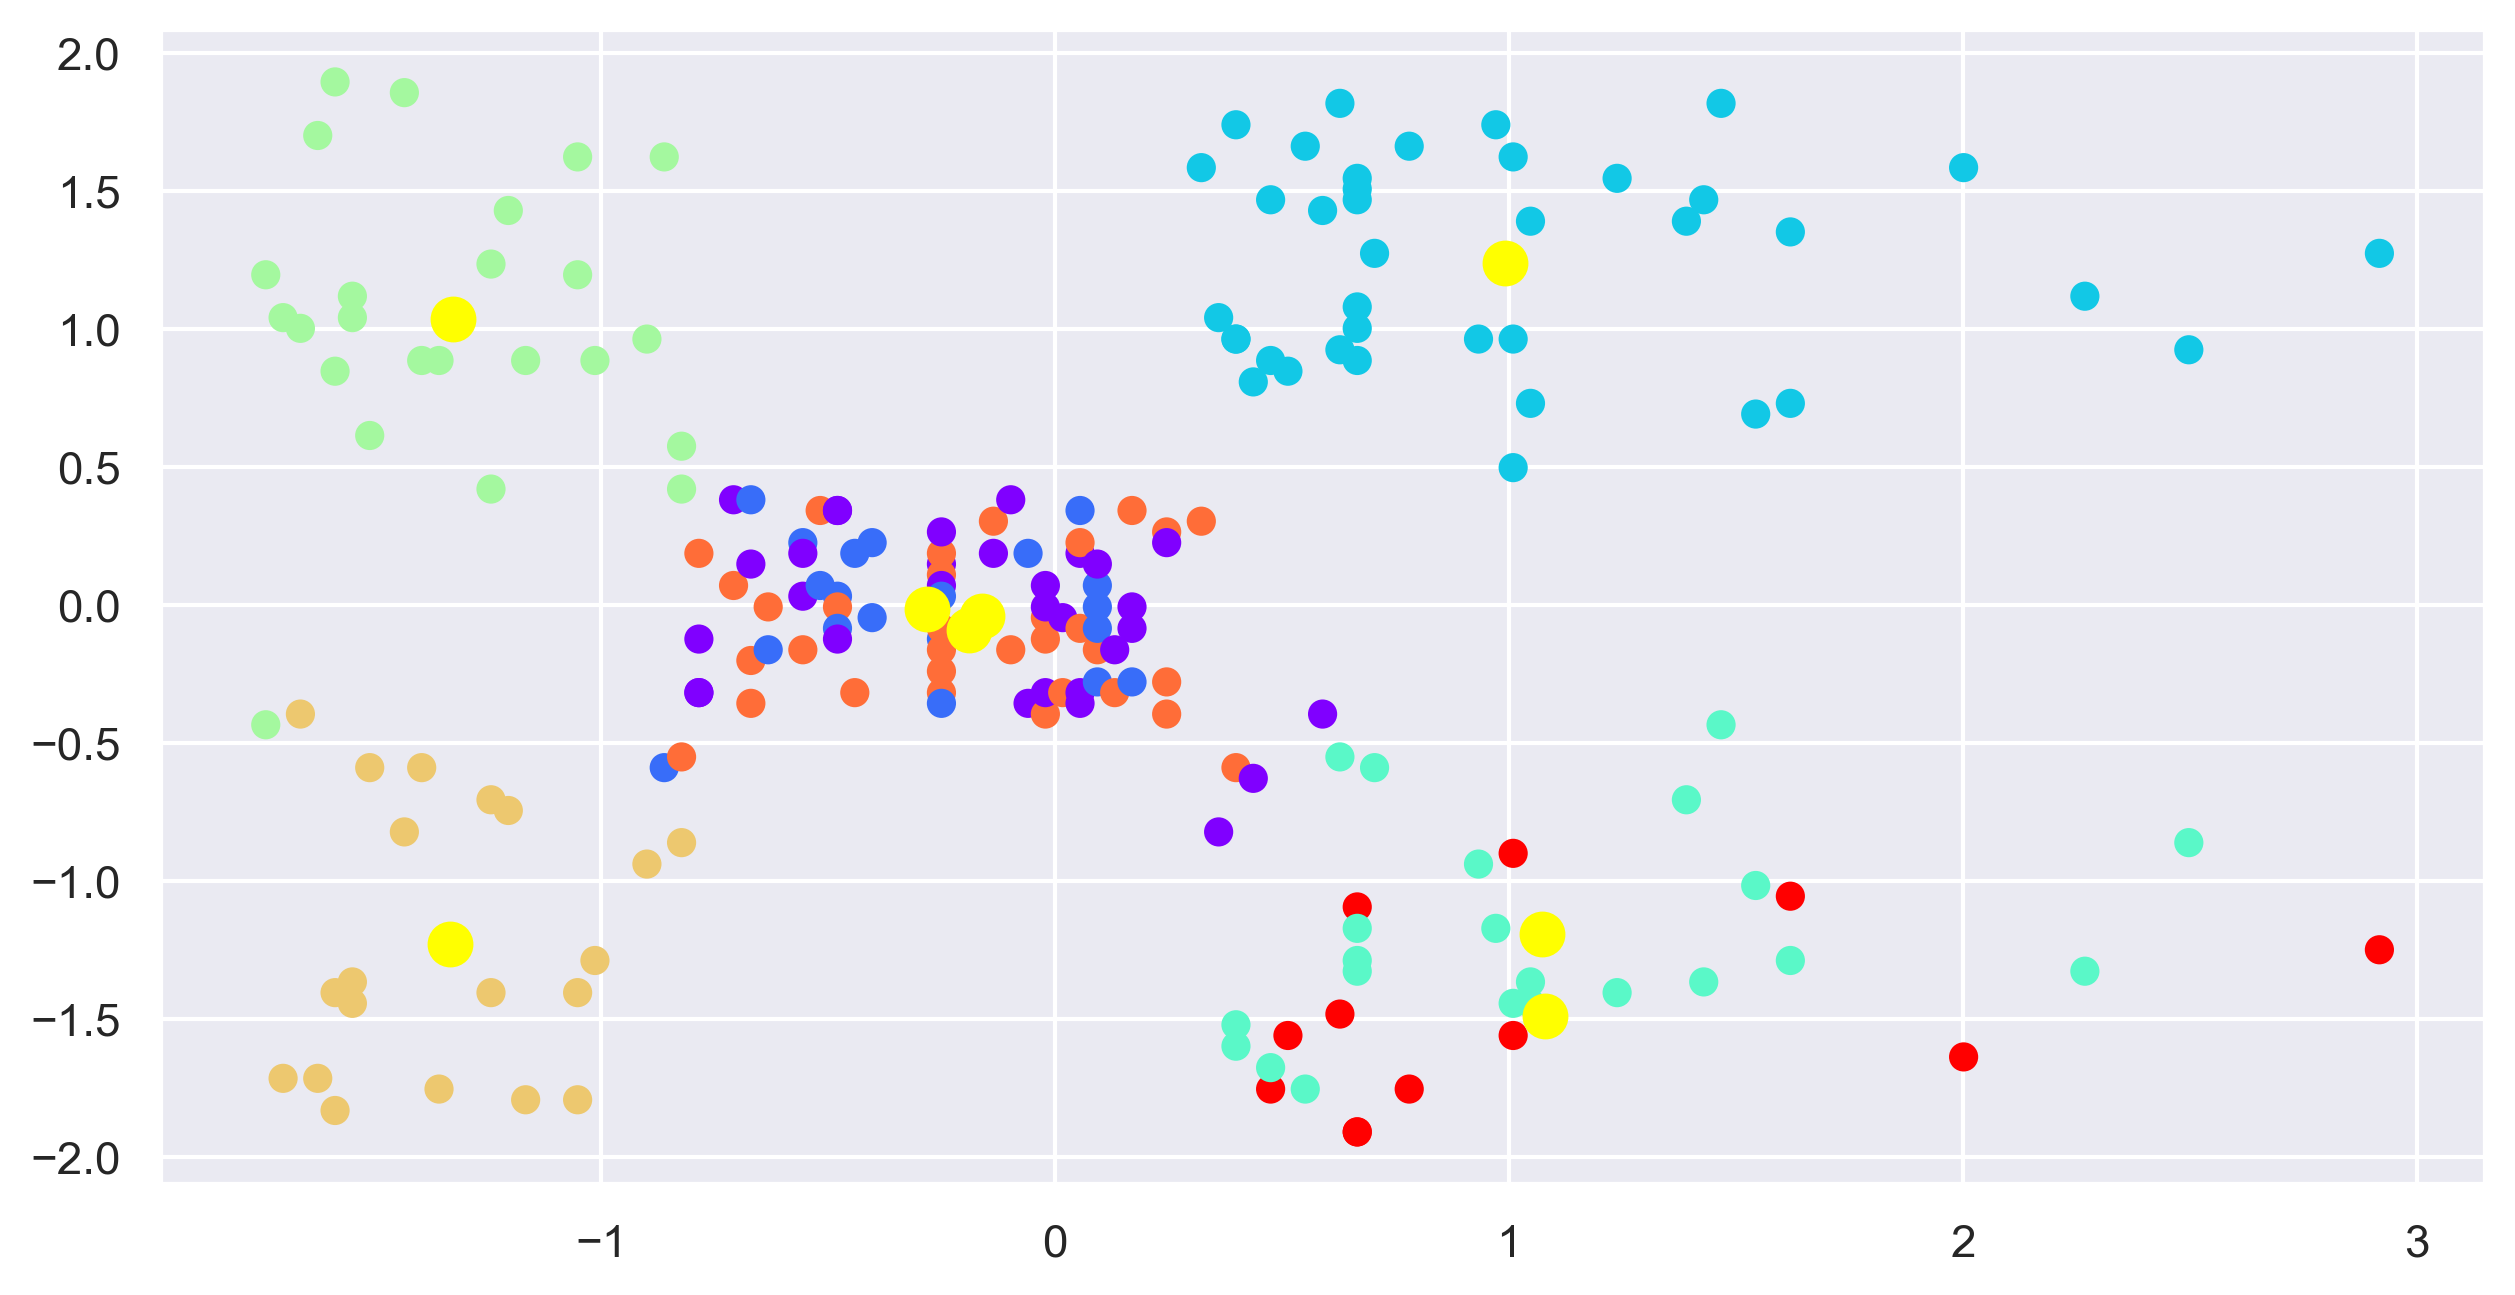

In [24]:
plt.scatter(x[:,1],x[:,2], c = yp, cmap='rainbow')
plt.scatter(km.cluster_centers_[:,1],km.cluster_centers_[:,2], c = 'yellow', s = 100)

# Elbow Graph

In [25]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

In [26]:
wcss

[600.0,
 389.3861889564371,
 295.2122461555489,
 205.22514747675916,
 168.24758017556837,
 133.86833362685582,
 117.01155455889811,
 103.82857758796288,
 94.08135912640334,
 82.78767252220604]

Text(0.5, 1.0, 'Elbow Graph')

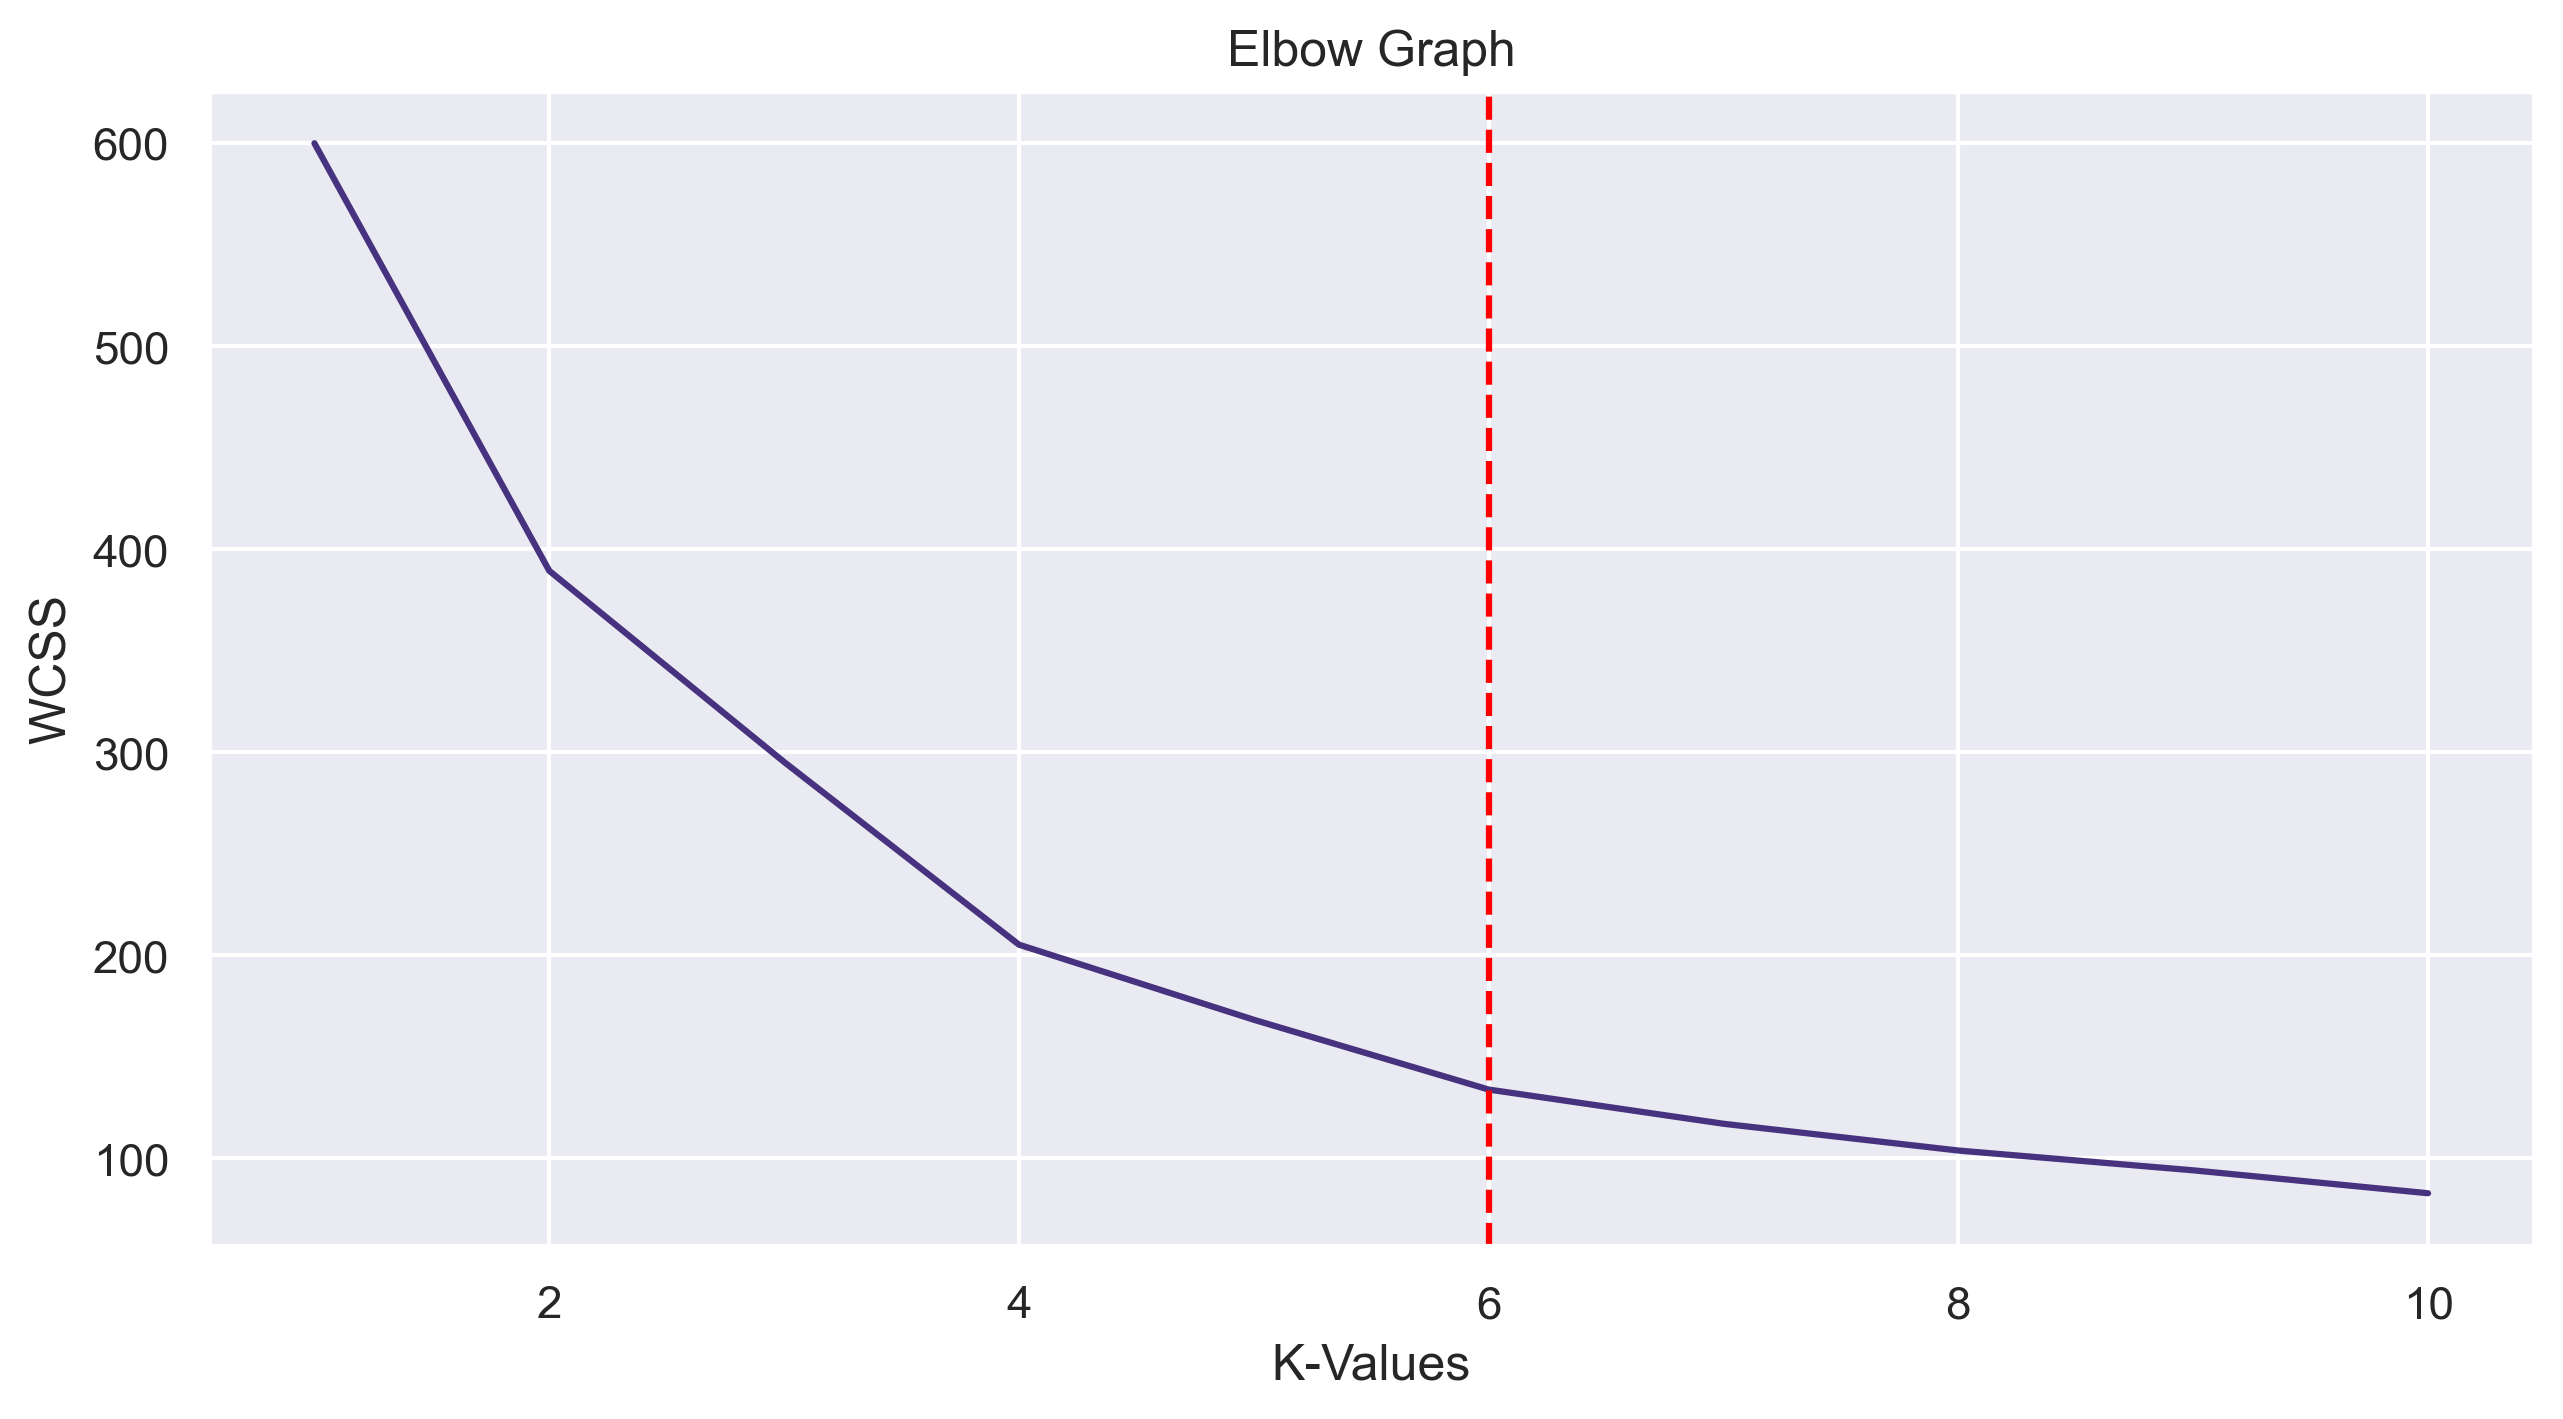

In [27]:
plt.plot(range(1,11),wcss)
plt.axvline(x = 6, linestyle = '--', color = 'red')
plt.xlabel('K-Values')
plt.ylabel('WCSS')
plt.title('Elbow Graph')

# Final Model

In [28]:
km = KMeans(n_clusters=6)
model = km.fit_predict(x)
model

array([5, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5,
       0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 1, 5, 0, 5,
       0, 5, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2,
       2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 4, 2, 4, 3, 4, 3, 4, 3, 4,
       2, 4, 3, 4, 3, 4, 2, 4, 3, 4, 2, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 1, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4])

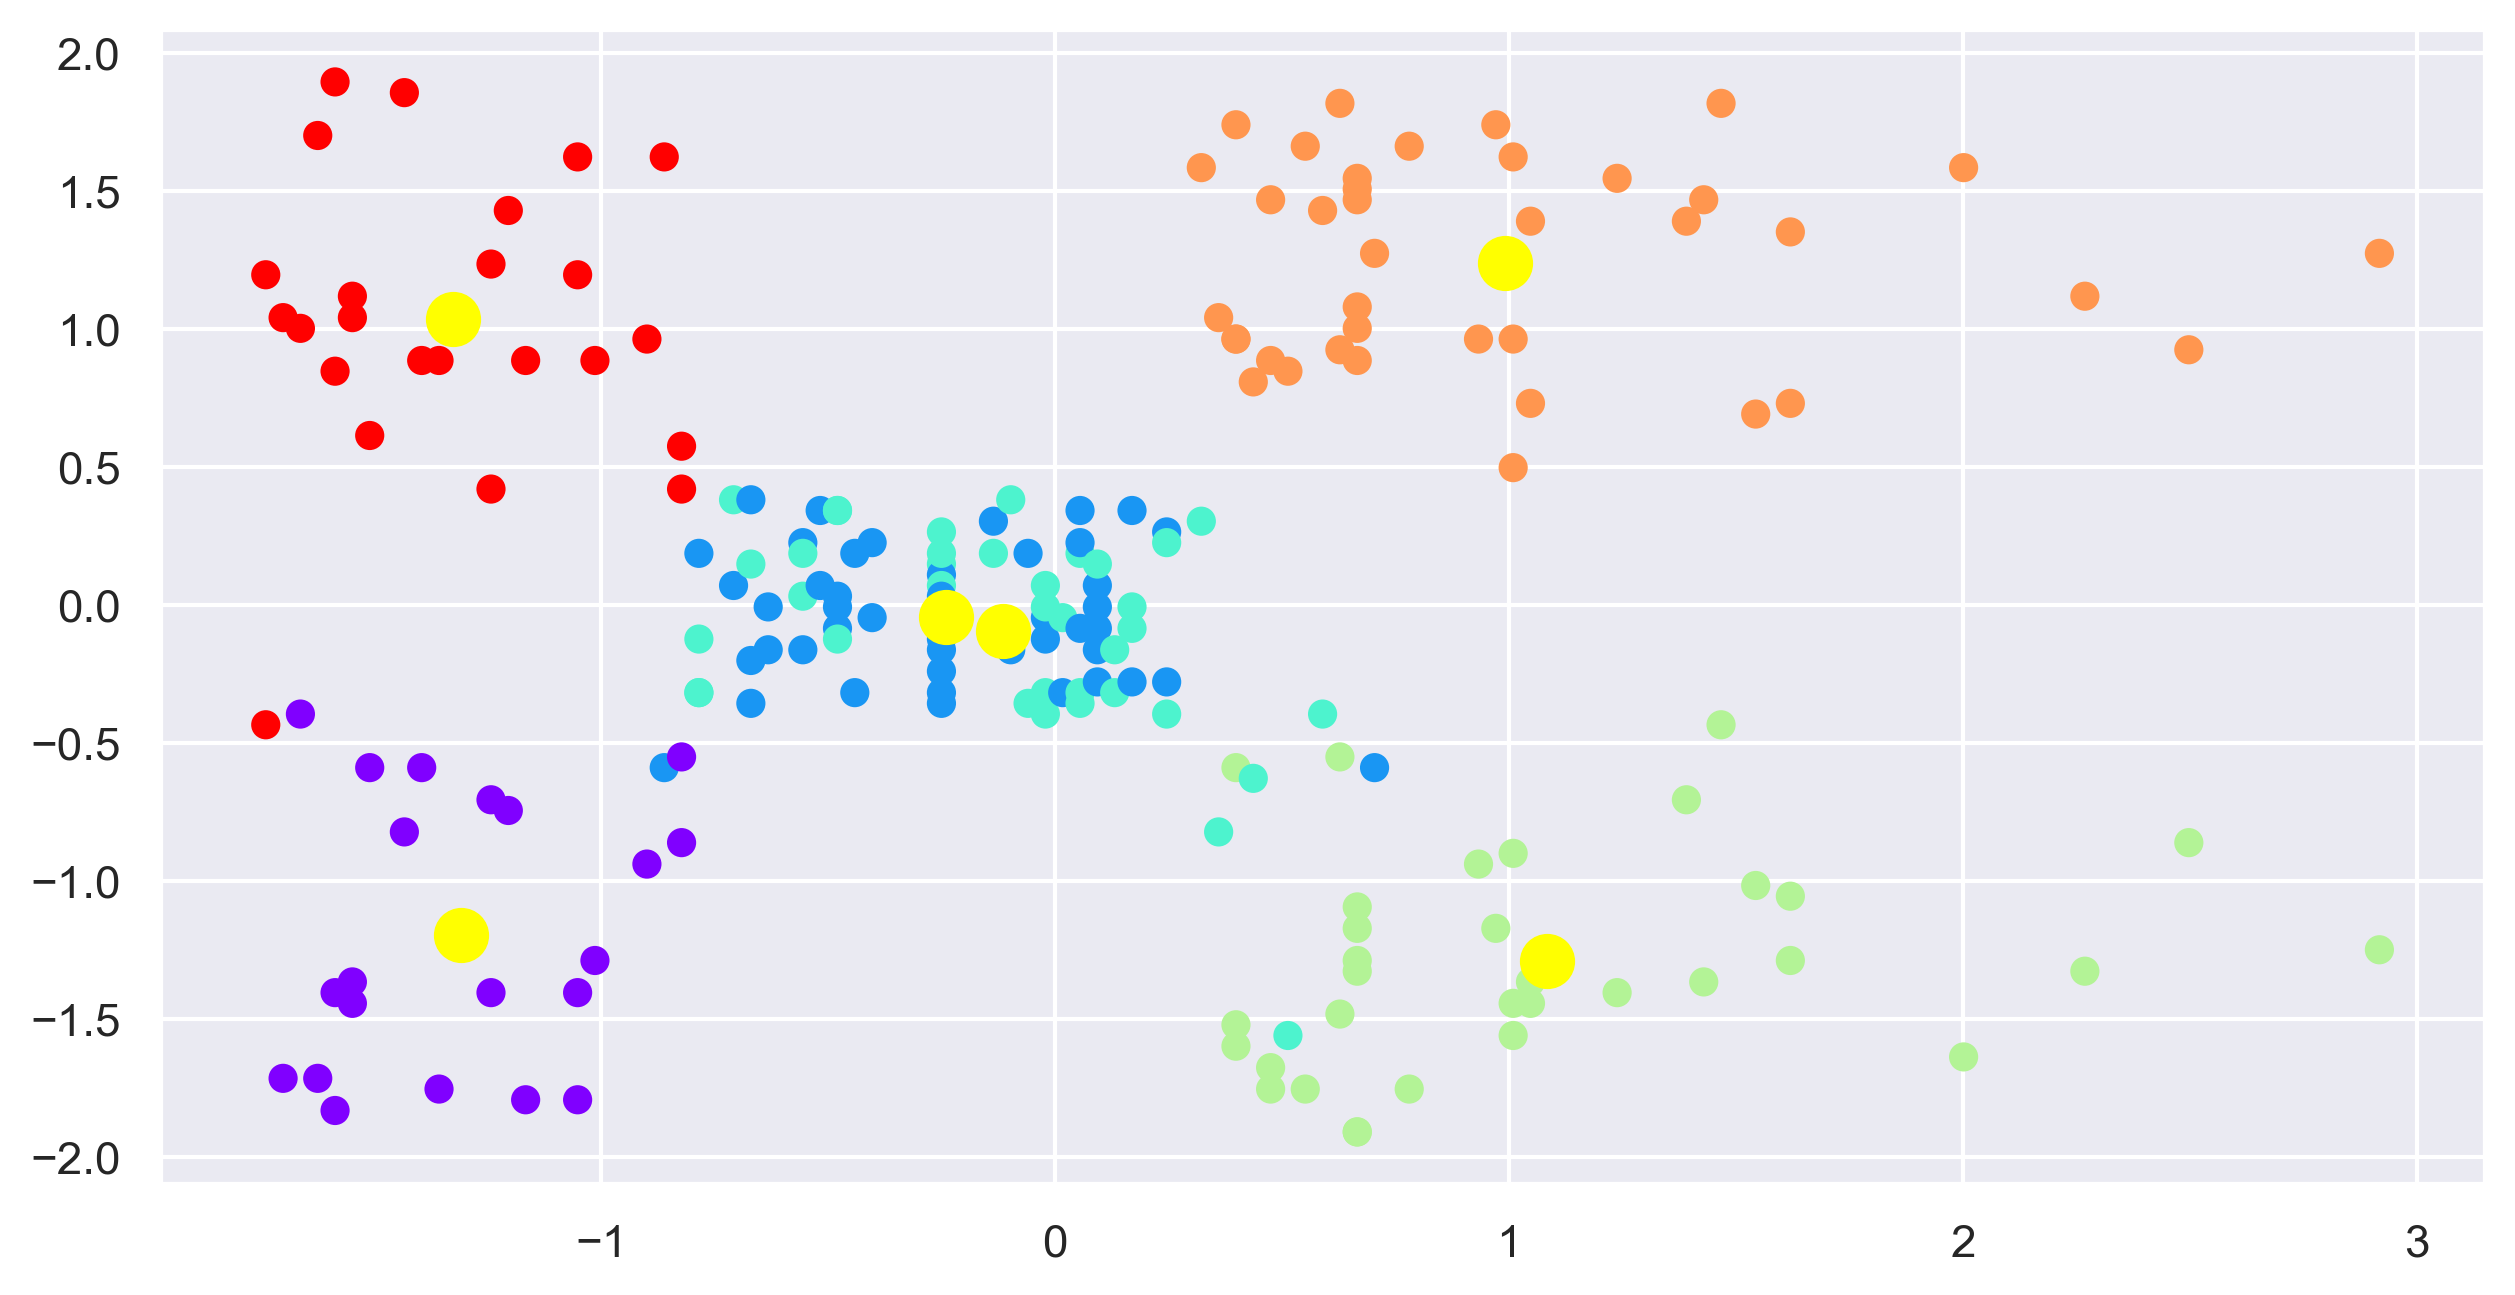

In [30]:
#Visualize the clusters

plt.scatter(x[:,1],x[:,2], c = model, cmap='rainbow')
plt.scatter(km.cluster_centers_[:,1],km.cluster_centers_[:,2], c = 'yellow', s = 150)

# Silhouette Score

In [32]:
from sklearn.metrics import silhouette_score

In [33]:
silhouette_score(x,model)

0.42742814991580175

In [34]:
#Analyzing clusters
df['cluster'] = model
df

,Gender,Age,Annual_Income,Spending_score,cluster
CustomerID,,,,,
1,Male,19,15,39,5
2,Male,21,15,81,5
3,Female,20,16,6,0
4,Female,23,16,77,5
5,Female,31,17,40,0
...,...,...,...,...,...
196,Female,35,120,79,4
197,Female,45,126,28,3
198,Male,32,126,74,4


In [35]:
df.groupby('cluster').agg('mean')

,Age,Annual_Income,Spending_score
cluster,,,
0,45.523810,26.285714,19.380952
1,56.333333,54.266667,49.066667
2,26.684211,57.578947,47.789474
3,41.939394,88.939394,16.969697
4,32.692308,86.538462,82.128205
5,25.250000,25.833333,76.916667


# Pipeline

In [36]:
import pickle

In [37]:
pickle.dump(model,open('kmeans_model.pkl','wb'))

In [38]:
df.head()

,Gender,Age,Annual_Income,Spending_score,cluster
CustomerID,,,,,
1,Male,19,15,39,5
2,Male,21,15,81,5
3,Female,20,16,6,0
4,Female,23,16,77,5
5,Female,31,17,40,0


In [41]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn import set_config
set_config(display='diagram')

In [50]:
transformer = ColumnTransformer(transformers=[
    ('tnf1',OneHotEncoder(),[0]),
    ('tnf2',StandardScaler(),[1,2,3])
], remainder='passthrough')

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
xtrain,xtest,ytrain,ytest = train_test_split(df.drop(columns=['cluster']), df['cluster'], test_size=0.2,random_state=42)

In [53]:
model = Pipeline(steps=[('transformer', transformer),('model',KMeans(n_clusters=6))])

In [54]:
model.fit(xtrain,ytrain)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf1', OneHotEncoder(), [0]),
                                                 ('tnf2', StandardScaler(),
                                                  [1, 2, 3])])),
                ('model', KMeans(n_clusters=6))])

In [55]:
ypred = model.predict(xtest)

In [56]:
pickle.dump(model, open('Segment_model.pkl','wb'))